In [589]:
import cv2
import sys
import pandas as pd
import numpy as np
from PIL import Image

In [590]:
image_test = cv2.imread('flowers.png')
image_test

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [591]:
type(image_test)

numpy.ndarray

In [592]:
image_test.shape

(225, 225, 3)

In [593]:
b, g, r = image_test[80,160]
print(b, g, r)

221 182 87


In [594]:
concatenated_lists = np.concatenate(image_test, axis=0)
concatenated_lists.shape

(50625, 3)

In [595]:
new_array = [tuple(row) for row in concatenated_lists]
uniques = np.unique(new_array, axis=0)
uniques.shape

(107, 3)

In [596]:
uniques

array([[ 74, 221, 255],
       [ 88, 218, 249],
       [ 89, 218, 249],
       [ 94, 208, 246],
       [101, 200, 243],
       [102, 214, 228],
       [106, 222, 250],
       [107, 195, 241],
       [111, 188, 239],
       [112, 212, 226],
       [118, 211, 216],
       [120, 224, 250],
       [122, 176, 235],
       [126, 166, 232],
       [130, 206, 197],
       [130, 227, 250],
       [133, 159, 230],
       [137, 152, 227],
       [141, 203, 183],
       [145, 145, 225],
       [147,  80, 103],
       [147, 136, 223],
       [148,  84, 114],
       [149,  84, 106],
       [149, 230, 251],
       [150,  85, 107],
       [150,  87, 113],
       [150, 133, 221],
       [151,  87, 109],
       [151, 201, 173],
       [152,  89, 110],
       [153,  85, 111],
       [153,  88, 112],
       [153,  90, 108],
       [153,  91, 112],
       [153,  99, 113],
       [153, 104, 114],
       [153, 112, 115],
       [153, 116, 116],
       [153, 122, 117],
       [153, 130, 118],
       [153, 136

In [597]:
import csv
from scipy import spatial as sp

DMC_CSV = "dmc.csv"

dmc_colors = []
with open(DMC_CSV, newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for index, row in enumerate(reader):
        dmc_colors.append(
            {
                "index": index,
                "floss": "#" + row["floss#"],
                "description": row["description"],
                "red": int(row["red"]),
                "green": int(row["green"]),
                "blue": int(row["blue"]),
                "hex": "#" + row["hex"],
                "dmc_row": row["row"],
            }
        )
rgb_colors = []

for color in dmc_colors:
    rgb_colors.append((color["red"], color["green"], color["blue"]))
print(dmc_colors)

[{'index': 0, 'floss': '#3713', 'description': 'Salmon Very Light', 'red': 255, 'green': 226, 'blue': 226, 'hex': '#FFE2E2', 'dmc_row': 'row 01-01'}, {'index': 1, 'floss': '#761', 'description': 'Salmon Light', 'red': 255, 'green': 201, 'blue': 201, 'hex': '#FFC9C9', 'dmc_row': 'row 01-02'}, {'index': 2, 'floss': '#760', 'description': 'Salmon', 'red': 245, 'green': 173, 'blue': 173, 'hex': '#F5ADAD', 'dmc_row': 'row 01-03'}, {'index': 3, 'floss': '#3712', 'description': 'Salmon Medium', 'red': 241, 'green': 135, 'blue': 135, 'hex': '#F18787', 'dmc_row': 'row 01-04'}, {'index': 4, 'floss': '#3328', 'description': 'Salmon Dark', 'red': 227, 'green': 109, 'blue': 109, 'hex': '#E36D6D', 'dmc_row': 'row 01-05'}, {'index': 5, 'floss': '#347', 'description': 'Salmon Very Dark', 'red': 191, 'green': 45, 'blue': 45, 'hex': '#BF2D2D', 'dmc_row': 'row 01-06'}, {'index': 6, 'floss': '#353', 'description': 'Peach', 'red': 254, 'green': 215, 'blue': 204, 'hex': '#FED7CC', 'dmc_row': 'row 01-07'}, {

In [598]:
def rgb_to_dmc(r, g, b):
    tree = sp.KDTree(rgb_colors)
    # don't need the Euclidean distance only the index
    _, reduced_colours_image = tree.query((r, g, b)) # TODO
    return dmc_colors[reduced_colours_image]

rgb_to_dmc(241, 195, 107) #241  195 107

{'index': 314,
 'floss': '#3821',
 'description': 'Straw',
 'red': 243,
 'green': 206,
 'blue': 117,
 'hex': '#F3CE75',
 'dmc_row': 'row 13-25'}

In [599]:
colours_list = [(rgb_to_dmc(element[2], element[1], element[0])) for element in uniques]
print(len(colours_list))
colours_list

107


[{'index': 323,
  'floss': '#726',
  'description': 'Topaz Light',
  'red': 253,
  'green': 215,
  'blue': 85,
  'hex': '#FDD755',
  'dmc_row': 'row 14-07'},
 {'index': 323,
  'floss': '#726',
  'description': 'Topaz Light',
  'red': 253,
  'green': 215,
  'blue': 85,
  'hex': '#FDD755',
  'dmc_row': 'row 14-07'},
 {'index': 323,
  'floss': '#726',
  'description': 'Topaz Light',
  'red': 253,
  'green': 215,
  'blue': 85,
  'hex': '#FDD755',
  'dmc_row': 'row 14-07'},
 {'index': 323,
  'floss': '#726',
  'description': 'Topaz Light',
  'red': 253,
  'green': 215,
  'blue': 85,
  'hex': '#FDD755',
  'dmc_row': 'row 14-07'},
 {'index': 314,
  'floss': '#3821',
  'description': 'Straw',
  'red': 243,
  'green': 206,
  'blue': 117,
  'hex': '#F3CE75',
  'dmc_row': 'row 13-25'},
 {'index': 269,
  'floss': '#3819',
  'description': 'Moss Green Lt',
  'red': 224,
  'green': 232,
  'blue': 104,
  'hex': '#E0E868',
  'dmc_row': 'row 12-05'},
 {'index': 328,
  'floss': '#743',
  'description': 

In [600]:
unique_colours_list = [dict(t) for t in {tuple(d.items()) for d in colours_list}]
len(unique_colours_list)

47

In [601]:
unique_colours_list

[{'index': 204,
  'floss': '#3817',
  'description': 'Celadon Green Lt',
  'red': 153,
  'green': 195,
  'blue': 170,
  'hex': '#99C3AA',
  'dmc_row': 'row 09-17'},
 {'index': 278,
  'floss': '#3013',
  'description': 'Khaki Green Lt',
  'red': 185,
  'green': 185,
  'blue': 130,
  'hex': '#B9B982',
  'dmc_row': 'row 12-14'},
 {'index': 224,
  'floss': '#368',
  'description': 'Pistachio Green Lt',
  'red': 166,
  'green': 194,
  'blue': 152,
  'hex': '#A6C298',
  'dmc_row': 'row 10-10'},
 {'index': 111,
  'floss': '#157',
  'description': 'Cornflower Blue Vy Lt',
  'red': 187,
  'green': 195,
  'blue': 217,
  'hex': '#BBC3D9',
  'dmc_row': 'row 05-19'},
 {'index': 195,
  'floss': '#993',
  'description': 'Aquamarine Vy Lt',
  'red': 144,
  'green': 192,
  'blue': 180,
  'hex': '#90C0B4',
  'dmc_row': 'row 09-08'},
 {'index': 413,
  'floss': '#B5200',
  'description': 'Snow White',
  'red': 255,
  'green': 255,
  'blue': 255,
  'hex': '#FFFFFF',
  'dmc_row': 'row 18-01'},
 {'index': 27

In [602]:
seq = [x['floss'] for x in colours_list]
print(len(seq))
print(seq)

107
['#726', '#726', '#726', '#726', '#3821', '#3819', '#743', '#3821', '#3827', '#3821', '#834', '#743', '#402', '#402', '#734', '#744', '#152', '#962', '#3013', '#962', '#3807', '#962', '#208', '#3807', '#744', '#3807', '#3746', '#3733', '#3746', '#368', '#3746', '#3746', '#3746', '#3746', '#3746', '#3746', '#3746', '#3746', '#3746', '#793', '#161', '#161', '#931', '#208', '#3733', '#3839', '#503', '#503', '#503', '#503', '#503', '#503', '#553', '#744', '#553', '#3746', '#209', '#316', '#3746', '#3733', '#3733', '#3733', '#3733', '#3733', '#368', '#3746', '#3746', '#3746', '#3733', '#793', '#161', '#3817', '#745', '#793', '#155', '#155', '#993', '#322', '#160', '#993', '#677', '#340', '#322', '#322', '#519', '#340', '#826', '#519', '#157', '#807', '#157', '#3078', '#159', '#807', '#807', '#3823', '#996', '#996', '#3747', '#996', '#746', '#3072', '#762', '#762', '#White', '#White', '#B5200']


In [603]:
# https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter
floss_counts = Counter(seq)
floss_counts

Counter({'#726': 4,
         '#3821': 3,
         '#3819': 1,
         '#743': 2,
         '#3827': 1,
         '#834': 1,
         '#402': 2,
         '#734': 1,
         '#744': 3,
         '#152': 1,
         '#962': 3,
         '#3013': 1,
         '#3807': 3,
         '#208': 2,
         '#3746': 16,
         '#3733': 8,
         '#368': 2,
         '#793': 3,
         '#161': 3,
         '#931': 1,
         '#3839': 1,
         '#503': 6,
         '#553': 2,
         '#209': 1,
         '#316': 1,
         '#3817': 1,
         '#745': 1,
         '#155': 2,
         '#993': 2,
         '#322': 3,
         '#160': 1,
         '#677': 1,
         '#340': 2,
         '#519': 2,
         '#826': 1,
         '#157': 2,
         '#807': 3,
         '#3078': 1,
         '#159': 1,
         '#3823': 1,
         '#996': 3,
         '#3747': 1,
         '#746': 1,
         '#3072': 1,
         '#762': 2,
         '#White': 2,
         '#B5200': 1})

In [604]:
floss_counts.most_common()

[('#3746', 16),
 ('#3733', 8),
 ('#503', 6),
 ('#726', 4),
 ('#3821', 3),
 ('#744', 3),
 ('#962', 3),
 ('#3807', 3),
 ('#793', 3),
 ('#161', 3),
 ('#322', 3),
 ('#807', 3),
 ('#996', 3),
 ('#743', 2),
 ('#402', 2),
 ('#208', 2),
 ('#368', 2),
 ('#553', 2),
 ('#155', 2),
 ('#993', 2),
 ('#340', 2),
 ('#519', 2),
 ('#157', 2),
 ('#762', 2),
 ('#White', 2),
 ('#3819', 1),
 ('#3827', 1),
 ('#834', 1),
 ('#734', 1),
 ('#152', 1),
 ('#3013', 1),
 ('#931', 1),
 ('#3839', 1),
 ('#209', 1),
 ('#316', 1),
 ('#3817', 1),
 ('#745', 1),
 ('#160', 1),
 ('#677', 1),
 ('#826', 1),
 ('#3078', 1),
 ('#159', 1),
 ('#3823', 1),
 ('#3747', 1),
 ('#746', 1),
 ('#3072', 1),
 ('#B5200', 1)]

In [605]:
floss_use_percentage = [
    (i, floss_counts[i] / len(colours_list) * 100.0)
    for i  in floss_counts]
floss_use_percentage

[('#726', 3.7383177570093453),
 ('#3821', 2.803738317757009),
 ('#3819', 0.9345794392523363),
 ('#743', 1.8691588785046727),
 ('#3827', 0.9345794392523363),
 ('#834', 0.9345794392523363),
 ('#402', 1.8691588785046727),
 ('#734', 0.9345794392523363),
 ('#744', 2.803738317757009),
 ('#152', 0.9345794392523363),
 ('#962', 2.803738317757009),
 ('#3013', 0.9345794392523363),
 ('#3807', 2.803738317757009),
 ('#208', 1.8691588785046727),
 ('#3746', 14.953271028037381),
 ('#3733', 7.476635514018691),
 ('#368', 1.8691588785046727),
 ('#793', 2.803738317757009),
 ('#161', 2.803738317757009),
 ('#931', 0.9345794392523363),
 ('#3839', 0.9345794392523363),
 ('#503', 5.607476635514018),
 ('#553', 1.8691588785046727),
 ('#209', 0.9345794392523363),
 ('#316', 0.9345794392523363),
 ('#3817', 0.9345794392523363),
 ('#745', 0.9345794392523363),
 ('#155', 1.8691588785046727),
 ('#993', 1.8691588785046727),
 ('#322', 2.803738317757009),
 ('#160', 0.9345794392523363),
 ('#677', 0.9345794392523363),
 ('#340'

In [606]:
limit_low_occuring_threads = 2  # %
filtered_floss_list = [
    color for color in floss_use_percentage if color[1] > limit_low_occuring_threads
]
filtered_floss_list

[('#726', 3.7383177570093453),
 ('#3821', 2.803738317757009),
 ('#744', 2.803738317757009),
 ('#962', 2.803738317757009),
 ('#3807', 2.803738317757009),
 ('#3746', 14.953271028037381),
 ('#3733', 7.476635514018691),
 ('#793', 2.803738317757009),
 ('#161', 2.803738317757009),
 ('#503', 5.607476635514018),
 ('#322', 2.803738317757009),
 ('#807', 2.803738317757009),
 ('#996', 2.803738317757009)]

In [607]:
floss_num, percent = zip(*filtered_floss_list)
floss_num

('#726',
 '#3821',
 '#744',
 '#962',
 '#3807',
 '#3746',
 '#3733',
 '#793',
 '#161',
 '#503',
 '#322',
 '#807',
 '#996')

In [608]:
filtered_floss_list_df = pd.DataFrame(filtered_floss_list).rename(columns={0: 'floss', 1: '%'})
filtered_floss_list_df

,floss,%
0,#726,3.738318
1,#3821,2.803738
2,#744,2.803738
3,#962,2.803738
4,#3807,2.803738
5,#3746,14.953271
6,#3733,7.476636
7,#793,2.803738
8,#161,2.803738
9,#503,5.607477


In [609]:
unique_colours_list_df = pd.DataFrame(unique_colours_list)
unique_colours_list_df[["floss", "description"]]

,floss,description
0,#3817,Celadon Green Lt
1,#3013,Khaki Green Lt
2,#368,Pistachio Green Lt
3,#157,Cornflower Blue Vy Lt
4,#993,Aquamarine Vy Lt
5,#B5200,Snow White
6,#734,Olive Green Lt
7,#726,Topaz Light
8,#553,Violet
9,#3819,Moss Green Lt


In [610]:
merged_colour_taables = pd.merge(filtered_floss_list_df, unique_colours_list_df, how="left", on="floss").sort_values('%', ascending=False)
rgb_palette = merged_colour_taables[["floss", "description", "red", "green", "blue","%"]]

In [611]:
rgb_palette

,floss,description,red,green,blue,%
5,#3746,Blue Violet Dark,119,107,152,14.953271
6,#3733,Dusty Rose,232,135,155,7.476636
9,#503,Blue Green Med,123,172,148,5.607477
0,#726,Topaz Light,253,215,85,3.738318
1,#3821,Straw,243,206,117,2.803738
2,#744,Yellow Pale,255,231,147,2.803738
3,#962,Dusty Rose Medium,230,138,138,2.803738
4,#3807,Cornflower Blue,96,103,140,2.803738
7,#793,Cornflower Blue Med,112,125,162,2.803738
8,#161,Blue Gray,120,128,164,2.803738


In [612]:
 # http://net-informations.com/ds/pd/iterate.htm
rgb_palette_list = [[x, y, z] for x, y,z in zip(rgb_palette['red'], rgb_palette['green'],rgb_palette['blue'])]
rgb_palette_list

[[119, 107, 152],
 [232, 135, 155],
 [123, 172, 148],
 [253, 215, 85],
 [243, 206, 117],
 [255, 231, 147],
 [230, 138, 138],
 [96, 103, 140],
 [112, 125, 162],
 [120, 128, 164],
 [90, 143, 184],
 [100, 171, 186],
 [48, 194, 236]]

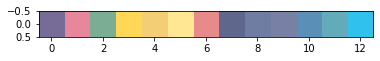

In [613]:
import matplotlib.pyplot as plt
plt.imshow([rgb_palette_list])

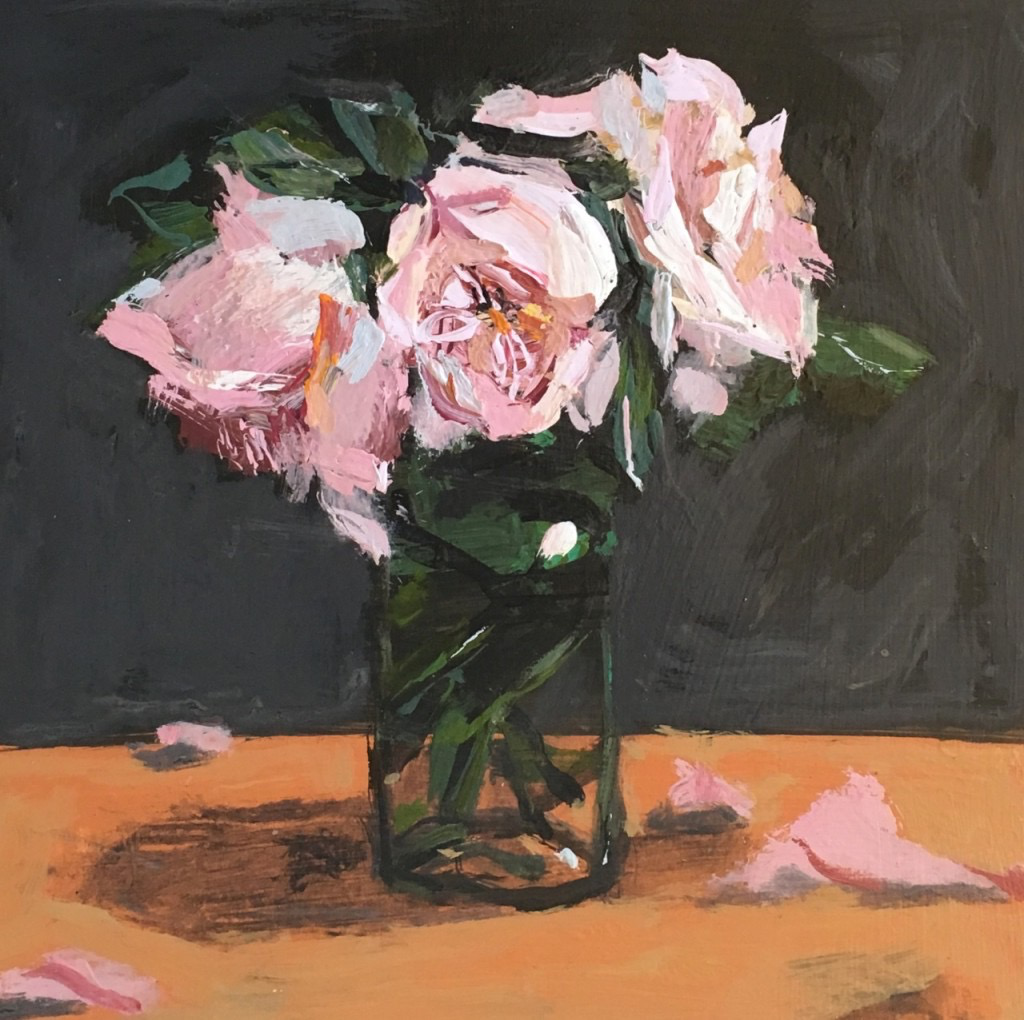

In [629]:
image = Image.open('test.png')
image

In [615]:
# import matplotlib.pyplot as plt
# plt.imshow(rgb_palette_list)
# plt.colorbar()
# plt.show()

In [616]:
# image = Image.open('flowers.png').convert('RGB')
# reduced_colours_image = image.convert('P', palette=Image.ADAPTIVE, colors=100)
# reduced_colours_image

In [617]:
# # Arrange all pixels into a tall column of 3 RGB values and find unique rows (colours)
# colours, counts = np.unique(na.reshape(-1,3), axis=0, return_counts=1)
# print(colours.shape)
# print(colours)
# print(counts)

In [618]:
# import csv
# from scipy import spatial as sp

# DMC_CSV = "dmc.csv"

# dmc_colors = []
# with open(DMC_CSV, newline="") as csvfile:
#     reader = csv.DictReader(csvfile)
#     for index, row in enumerate(reader):
#         dmc_colors.append(
#             {
#                 "index": index,
#                 "floss": "#" + row["floss#"],
#                 "description": row["description"],
#                 "red": int(row["red"]),
#                 "green": int(row["green"]),
#                 "blue": int(row["blue"]),
#                 "hex": "#" + row["hex"],
#                 "dmc_row": row["row"],
#             }
#         )
# rgb_colors = []

# for color in dmc_colors:
#     rgb_colors.append((color["red"], color["green"], color["blue"]))
# print(dmc_colors)

In [619]:
# def rgb_to_dmc(r, g, b):
#     tree = sp.KDTree(rgb_colors)
#     # don't need the Euclidean distance only the index
#     _, reduced_colours_image = tree.query((r, g, b))
#     return dmc_colors[reduced_colours_image]

# rgb_to_dmc(33, 108, 163)

In [620]:
# colours_list = [(rgb_to_dmc(element[0], element[1], element[2])) for element in colours]
# print(len(colours_list))
# colours_list

In [621]:
# unique_colours_list = [dict(t) for t in {tuple(d.items()) for d in colours_list}]
# len(unique_colours_list)

In [622]:
# from collections import Counter
# data = Counter(colours_list)
# data.most_common()   # Returns all unique items and their counts
# data.most_common(1)  # Returns the highest occurring item

# seq = [x['floss'] for x in colours_list]
# print(len(seq))
# print(seq)

In [623]:
# # https://docs.python.org/3/library/collections.html#collections.Counter
# from collections import Counter
# floss_counts = Counter(seq)
# floss_counts

In [624]:
# floss_counts.most_common()

In [625]:
# floss_use_percentage = [
#     (i, floss_counts[i] / len(colours) * 100.0)
#     for i  in floss_counts]
# floss_use_percentage

In [626]:
# limit_low_occuring_threads = 1  # %
# filtered_floss_list = [
#     color for color in floss_use_percentage if color[1] > limit_low_occuring_threads
# ]
# filtered_floss_list

In [627]:
# floss_num, percent = zip(*filtered_floss_list)
# filtered_floss_list_df = pd.DataFrame(filtered_floss_list).rename(columns={0: 'floss', 1: '%'})
# unique_colours_list_df = pd.DataFrame(unique_colours_list)
# unique_colours_list_df[["floss", "description"]]
# result = pd.merge(filtered_floss_list_df, unique_colours_list_df, how="left", on="floss").sort_values('%', ascending=False)
# rgb_palette = result[["floss", "red", "green", "blue"]]
#  # http://net-informations.com/ds/pd/iterate.htm
# rgb_palette_list = [[x, y, z] for x, y,z in zip(rgb_palette['red'], rgb_palette['green'],rgb_palette['blue'])]

# import matplotlib.pyplot as plt
# plt.imshow(rgb_palette_list)
# plt.colorbar()
# plt.show()

In [628]:
# import matplotlib.pyplot as plt
# from skimage import io
# palette = np.array(rgb_palette_list, dtype=np.uint8)
# m, n = 4, 4
# indices = np.random.randint(0, len(palette), size=(4, 4))
# io.imshow(palette[indices])